In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [128]:
df=pd.read_csv("/content/loan_data.csv")

# Data Analysis

In [129]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [130]:
df.shape

(381, 13)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [132]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [133]:
df.dropna(inplace=True)

In [134]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [135]:
df.shape

(308, 13)

In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

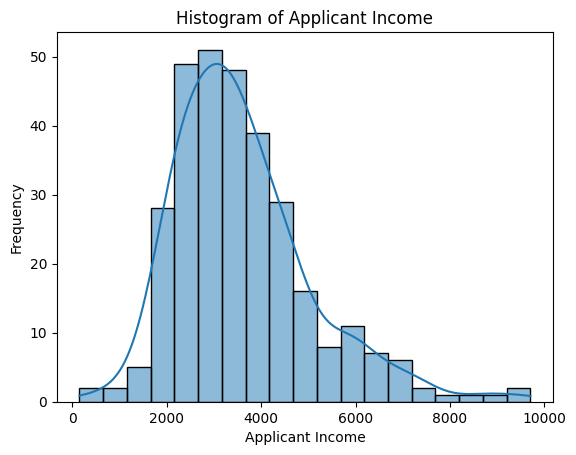

In [138]:
sns.histplot(df['ApplicantIncome'],kde=True)
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [139]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

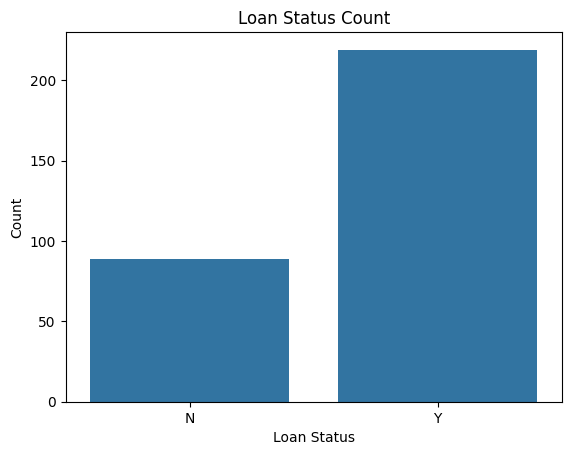

In [140]:
sns.countplot(x=df['Loan_Status'])
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [141]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [142]:
avg_loan_amount_by_education = df.groupby('Education')['LoanAmount'].mean().reset_index()#so it give dataframe
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


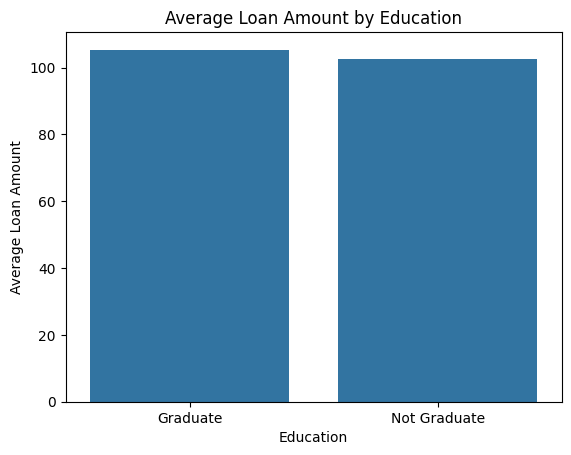

In [143]:
sns.barplot(x='Education',y='LoanAmount',data=avg_loan_amount_by_education)
plt.title('Average Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Average Loan Amount')
plt.show()

In [144]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

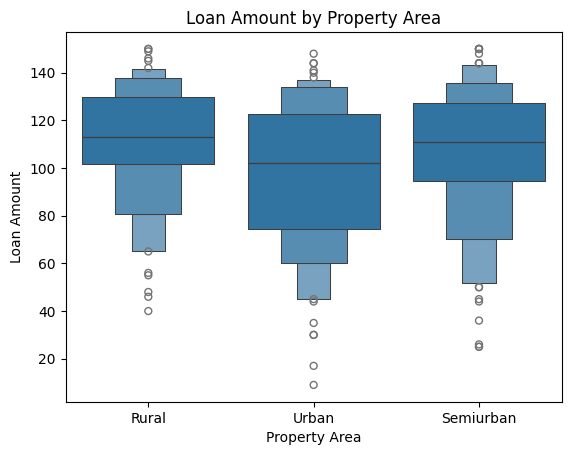

In [145]:
sns.boxenplot(x='Property_Area',y='LoanAmount',data=df)
plt.title('Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()

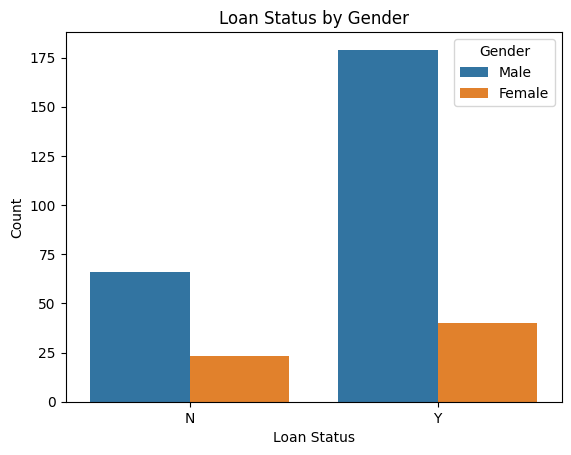

In [146]:
sns.countplot(x='Loan_Status',hue='Gender',data=df)
plt.title('Loan Status by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

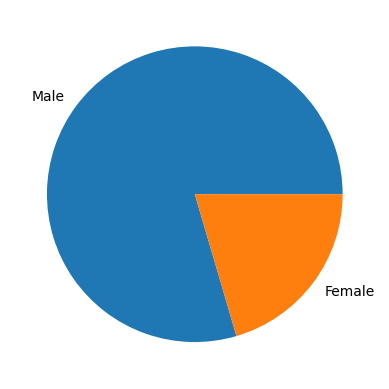

In [147]:
df['Gender'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


In [148]:
loan_status_by_married = df.groupby('Married')['Loan_Status'].value_counts().unstack()
loan_status_by_married

Loan_Status,N,Y
Married,,
No,44,79
Yes,45,140


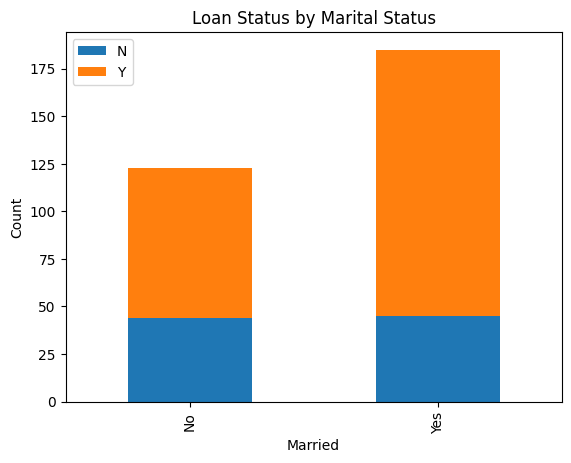

In [149]:
loan_status_by_married.plot(kind='bar',stacked=True)
plt.title('Loan Status by Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend()
plt.show()

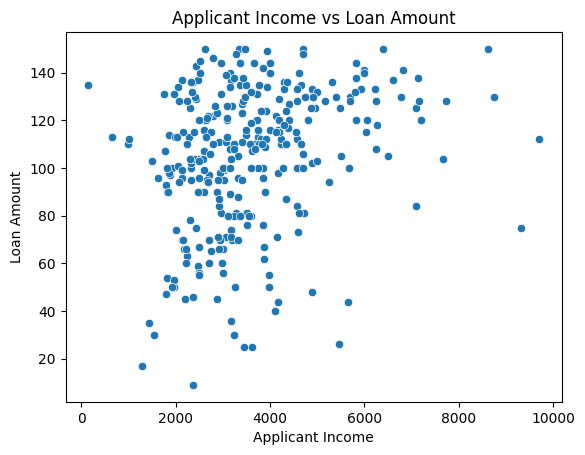

In [150]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [151]:
numeric_df=df.select_dtypes(include=['int64','float64'])
numeric_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0


In [152]:
correlation_matrix=numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


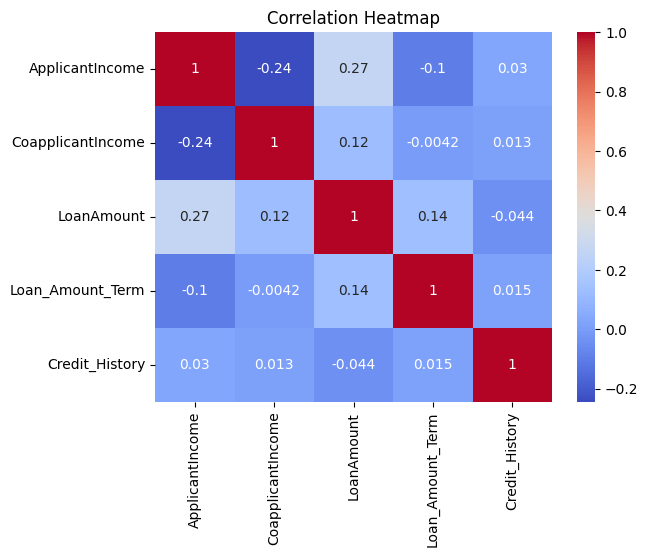

In [153]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [154]:
avg_loan_term_by_employed=df.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


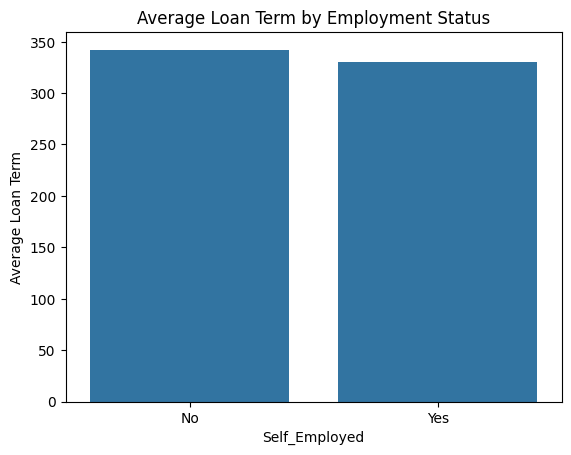

In [155]:
sns.barplot(x='Self_Employed',y='Loan_Amount_Term',data=avg_loan_term_by_employed)
plt.title('Average Loan Term by Employment Status')
plt.xlabel('Self_Employed')
plt.ylabel('Average Loan Term')
plt.show()

# Feature Engineering

In [156]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [157]:
df['Credit_History'].unique()

array([1., 0.])

In [158]:
X=df[['Married','ApplicantIncome','Education','LoanAmount','Credit_History']]
y=df[['Loan_Status']]

In [159]:
X.head()

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0


In [160]:
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [161]:
#Labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [162]:
y['Loan_Status']=le.fit_transform(y['Loan_Status'])

In [163]:
y              # N:0,Y:1

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [164]:
X.head()

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0


In [165]:
X['Married']=le.fit_transform(X['Married'])
X['Education']=le.fit_transform(X['Education'])

In [166]:
X.head()

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0


In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [168]:
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [169]:
import joblib
joblib.dump(scaler,'scaler.pkl')


['scaler.pkl']

# Training Model

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
def modelperformance(prediction):
  print('Accuracy Score in model is {}:'.format(accuracy_score(y_test,prediction)))

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

log_prediction=log_model.predict(X_test)
modelperformance(log_prediction)

Accuracy Score in model is 0.8064516129032258:


In [175]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors':[3,5,7,8,6],
            'weights':['uniform','distance']}
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid)

gridkn.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8, 6],
                         'weights': ['uniform', 'distance']})

In [176]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [177]:
knpred=gridkn.predict(X_test)
modelperformance(knpred)

Accuracy Score in model is 0.7903225806451613:


In [178]:
from sklearn.svm import SVC

In [179]:
svm=SVC()
param_grid_svc={'C':[0.03,0.01,0.02,0.1,0.5],'kernel':['linear','rbf','poly']}

gridsvc=GridSearchCV(svm,param_grid_svc)
gridsvc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.03, 0.01, 0.02, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [180]:
gridsvc.best_params_

{'C': 0.03, 'kernel': 'linear'}

In [181]:
pred_svc=gridsvc.predict(X_test)
modelperformance(pred_svc)

Accuracy Score in model is 0.8064516129032258:


In [182]:
joblib.dump(gridsvc,'model.pkl')

['model.pkl']

In [183]:
import joblib

testmodel=joblib.load('model.pkl')

In [190]:
testmodel.predict([[0,3500,1,100,1]])

array([1])